# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

### Data Import

In [2]:
#Data Import
data = pd.read_csv('Wholesale_Data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Cleaning

In [4]:
data.info() # There are no null values in the colummn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe() #there seems to be an abnormal distibution for the columns with the groceries

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Data Visualization

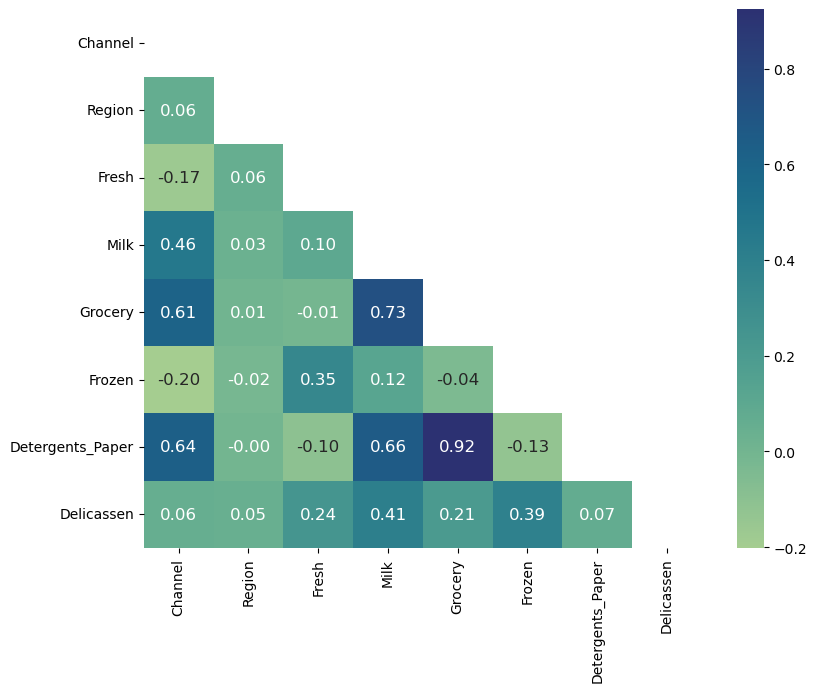

'\nThe correlation between Detergents paper and grocery is the highest at 0.92\nThere is also a high correlation between the grocery and Milk of 0.73\n0.66 between Milk and Detergent paper\n0.64 between detergent paper and Channel\n0.61 between grocery and Channel\n\n'

In [6]:
#correlation heatmap
plt.figure(figsize=(9,7))
sns.heatmap(
   data.corr(),
   annot=True,
   annot_kws={'size':'large'},
   fmt=".2f",
   cmap="crest",
   mask=np.triu(np.ones_like(data.corr(), dtype=bool))
)
plt.savefig('CorrelationHeatmapWithOutliers3.png')
plt.show()

'''
The correlation between Detergents paper and grocery is the highest at 0.92
There is also a high correlation between the grocery and Milk of 0.73
0.66 between Milk and Detergent paper
0.64 between detergent paper and Channel
0.61 between grocery and Channel

'''



In [7]:
groc_data = data.drop(columns=['Channel', 'Region']) #creating subset of the data

<Figure size 1800x1200 with 0 Axes>

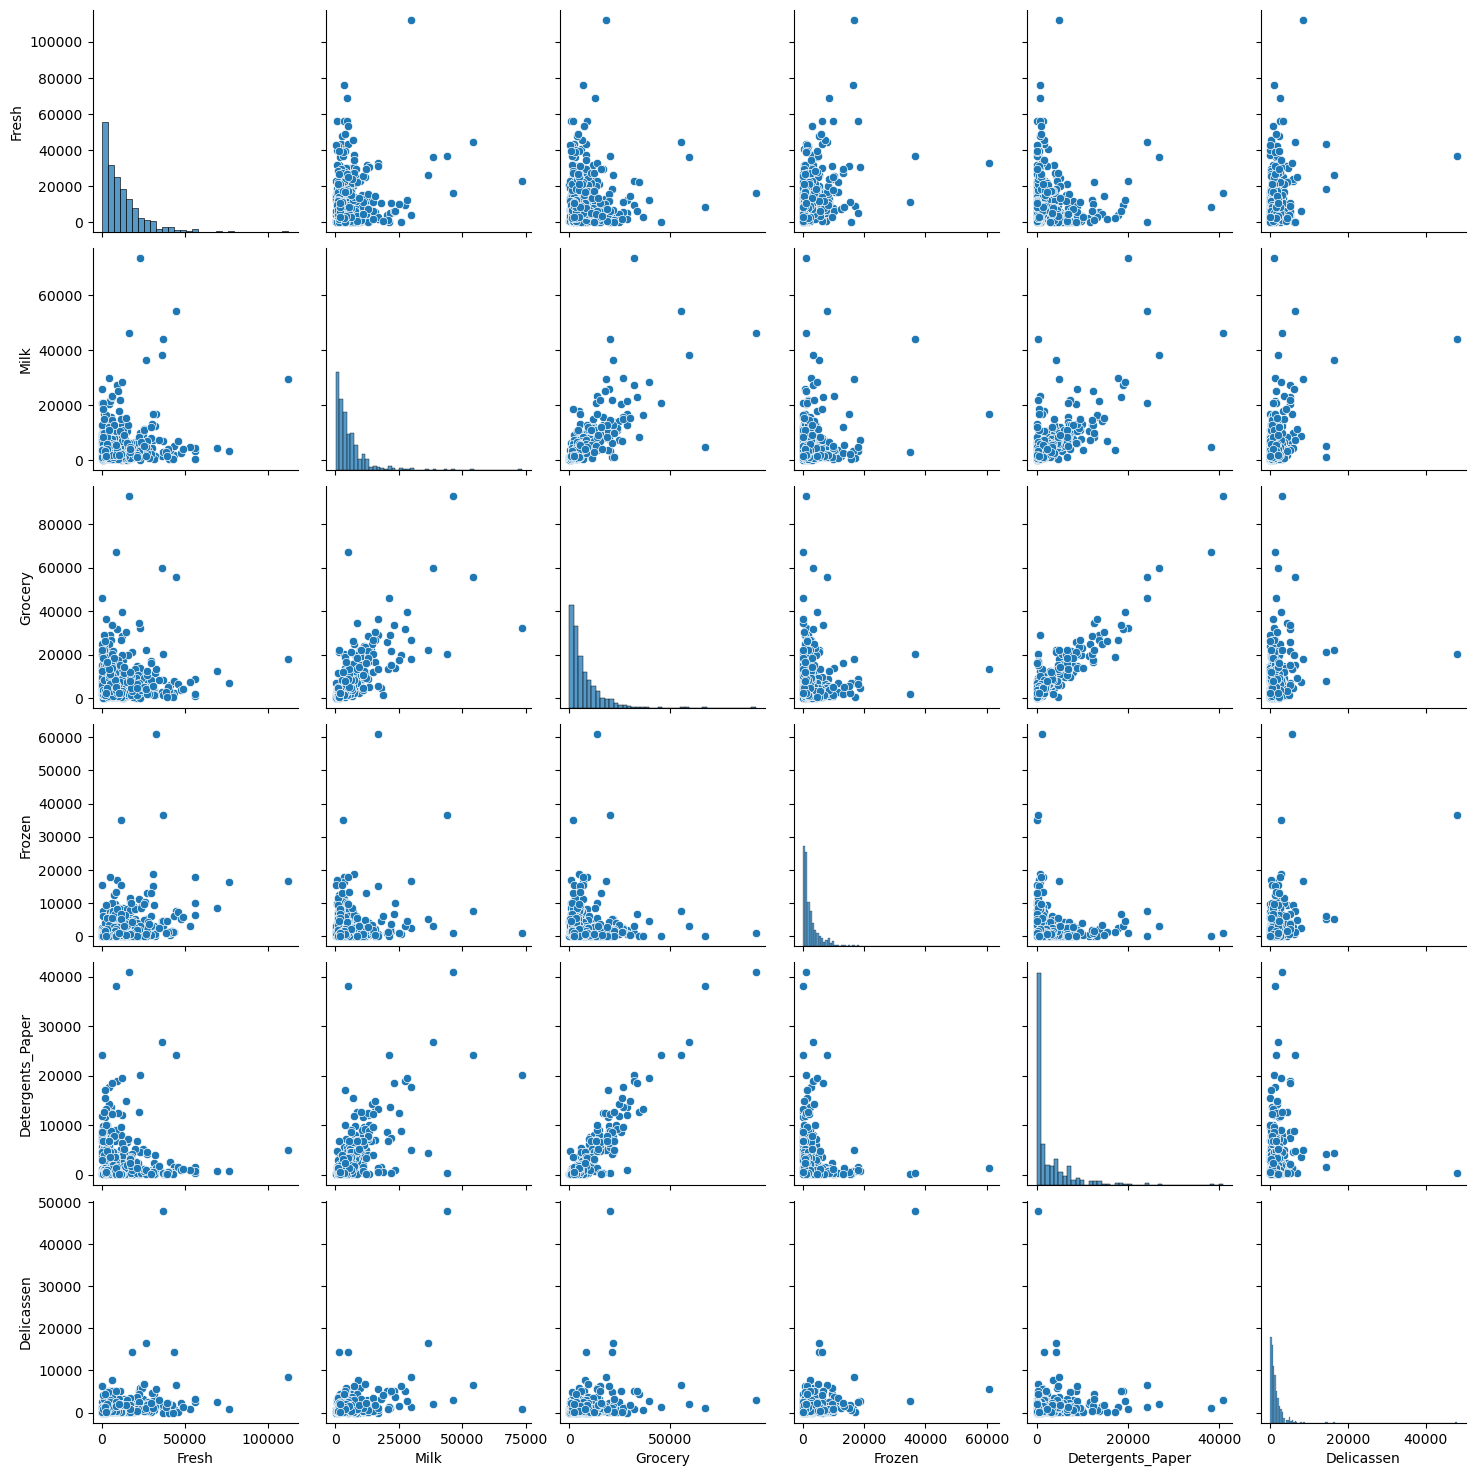

'\n- The distribution of the data shows an extreme right skew of the data for all the data in the groc_data column\n- It also shows that there are noise that can be founfd in each column\n'

In [8]:
#Pairplot for all our column
plt.figure(figsize=(18,12))
sns.pairplot(groc_data)
plt.savefig('PairplotWithOutliers.png')
plt.show()
'''
- The distribution of the data shows an extreme right skew of the data for all the data in the groc_data column
- It also shows that there are noise that can be founfd in each column
'''

In [9]:
grocery_columns=['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicassen']

In [10]:
# making boxplot for all the columns in the grocery columns to show the distribution of the columns
def plot_boxplot(df, columns=grocery_columns):
    for i in columns:
        sns.boxplot(
            y=data[i],
            x=data['Region'],
            hue=data['Channel'])
        plt.savefig(f'{i}BoxplotWithOutliers')
        plt.show()

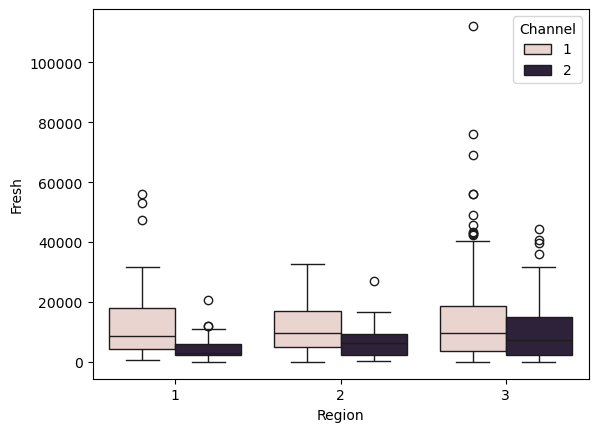

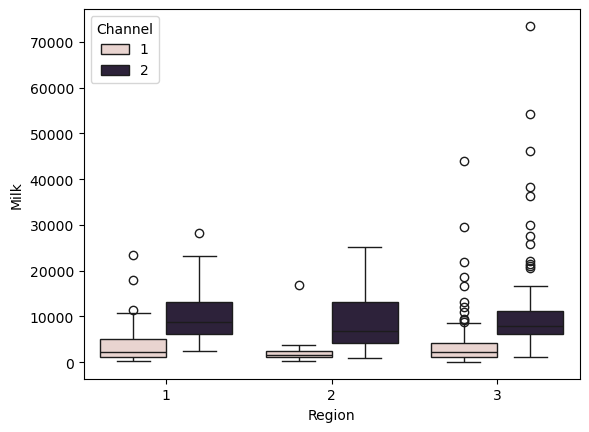

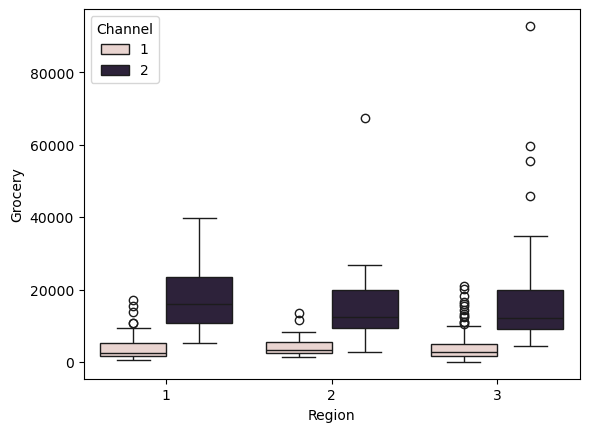

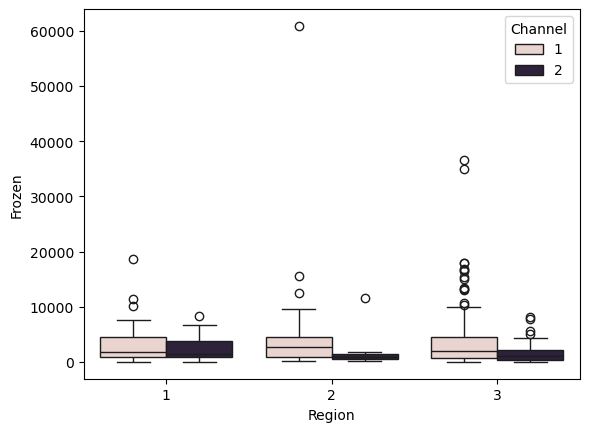

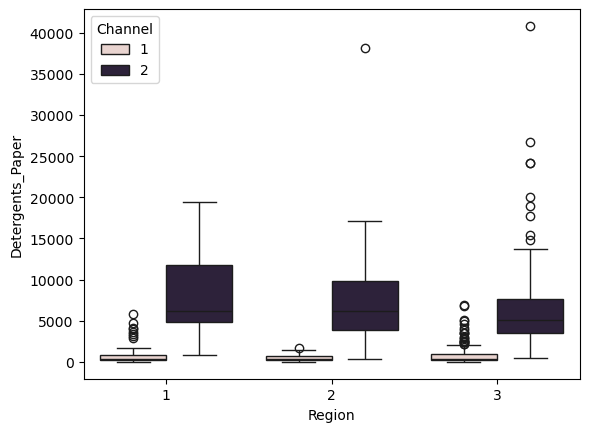

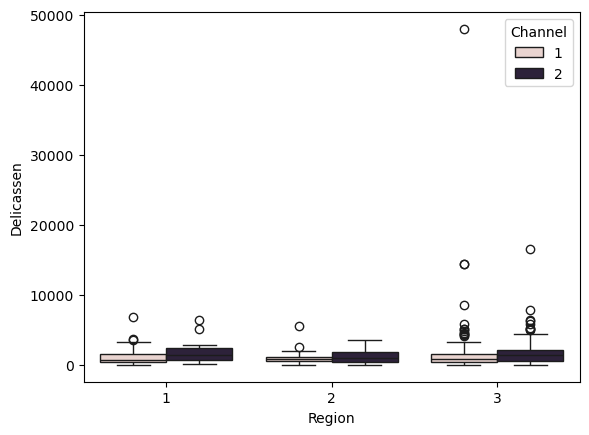

In [11]:
plot_boxplot(data)

In [13]:

def removing_outliers(data):
    for column_name, column_data in data.items():
        if pd.api.types.is_numeric_dtype(column_data):
            Q1 = column_data.quantile(0.25)
            Q3 = column_data.quantile(0.75)

            # Calculate the IQR
            IQR = Q3 - Q1

            # Defining outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify Non-Outliers
            non_outliers = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

            # Calculate the average of Non-Outliers Values
            average_non_outliers = int(non_outliers.mean())

            # Replace outliers with the avg of non-outliers
            data.loc[(column_data < lower_bound) | (column_data > upper_bound), column_name] = average_non_outliers

    return data
        


In [14]:
data_clean = removing_outliers(data)

In [15]:
data_clean.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000,440.000000
mean,1.322727,2.543182,10105.852273,4326.311364,6303.272727,1936.72500,1878.397727,1092.059091
std,0.468052,0.774272,8443.940854,3398.085071,5328.095069,1670.45759,2242.029317,839.873456
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.00000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.25000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.00000,816.500000,965.500000
75%,2.000000,3.000000,14792.000000,6202.000000,8860.750000,2534.00000,2688.000000,1525.000000
max,2.000000,3.000000,37036.000000,15488.000000,23127.000000,7683.00000,9265.000000,3637.000000


In [16]:
# making boxplot for all the columns in the grocery columns to show the distribution of the columns
def plot_boxplot_cleandata(df, columns=grocery_columns):
    for i in columns:
        sns.boxplot(
            y=data[i],
            x=data['Region'],
            hue=data['Channel'])
        plt.savefig(f'{i}BoxplotWithoutOutliers')
        plt.show()

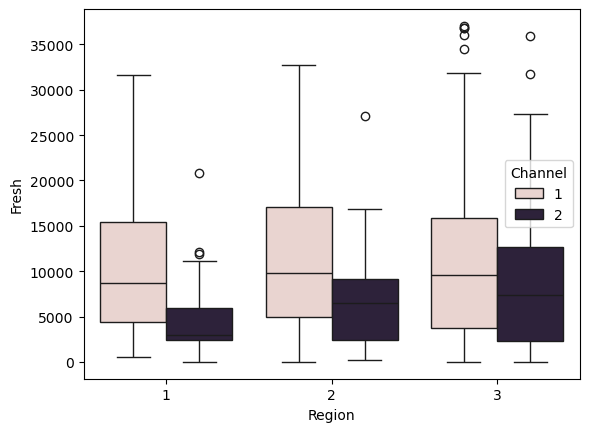

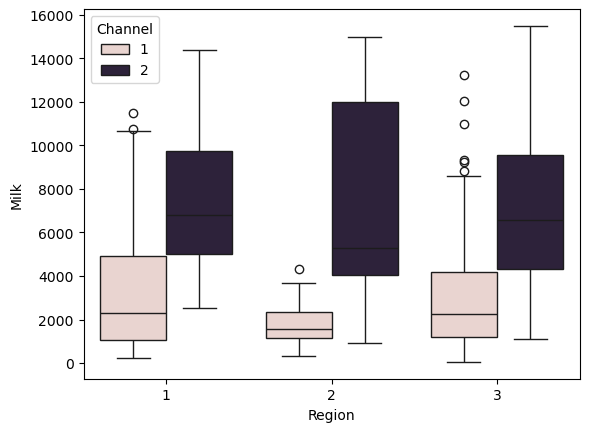

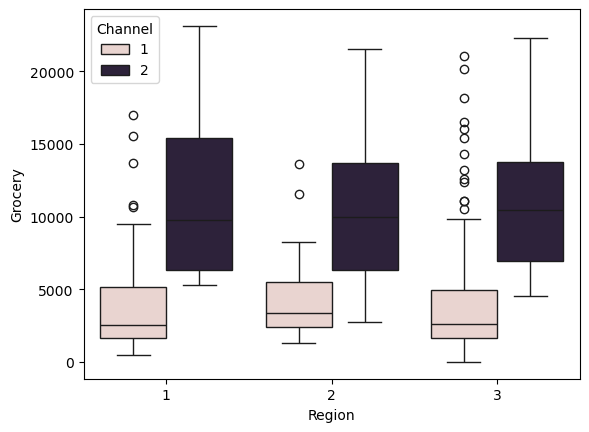

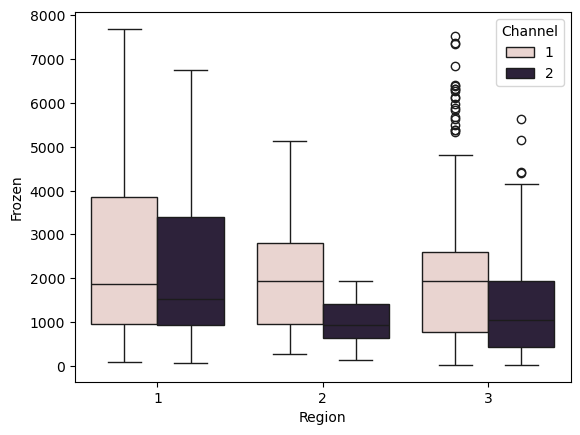

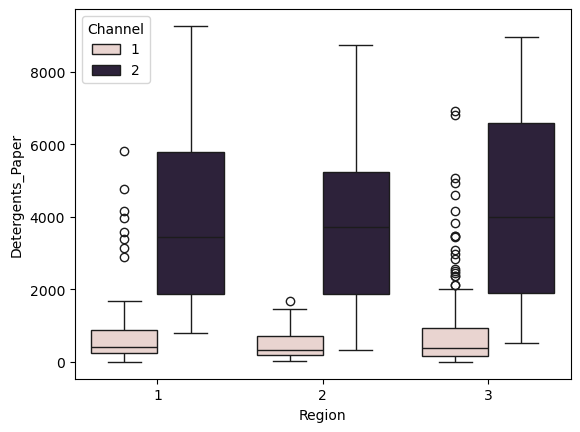

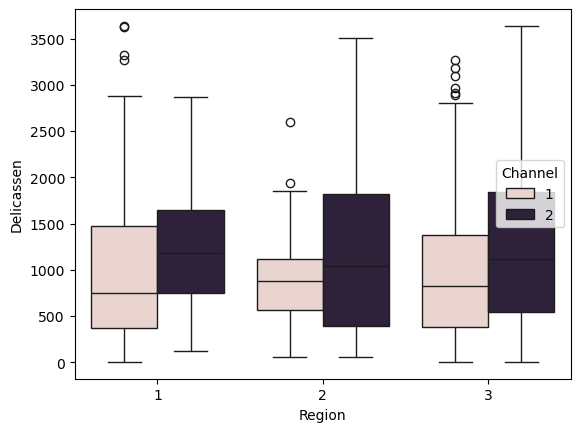

In [17]:
plot_boxplot_cleandata(data_clean)

In [18]:
groc_data_clean = data_clean.drop(columns=['Channel', 'Region']) #creating subset of the clean data

<Figure size 1800x1200 with 0 Axes>

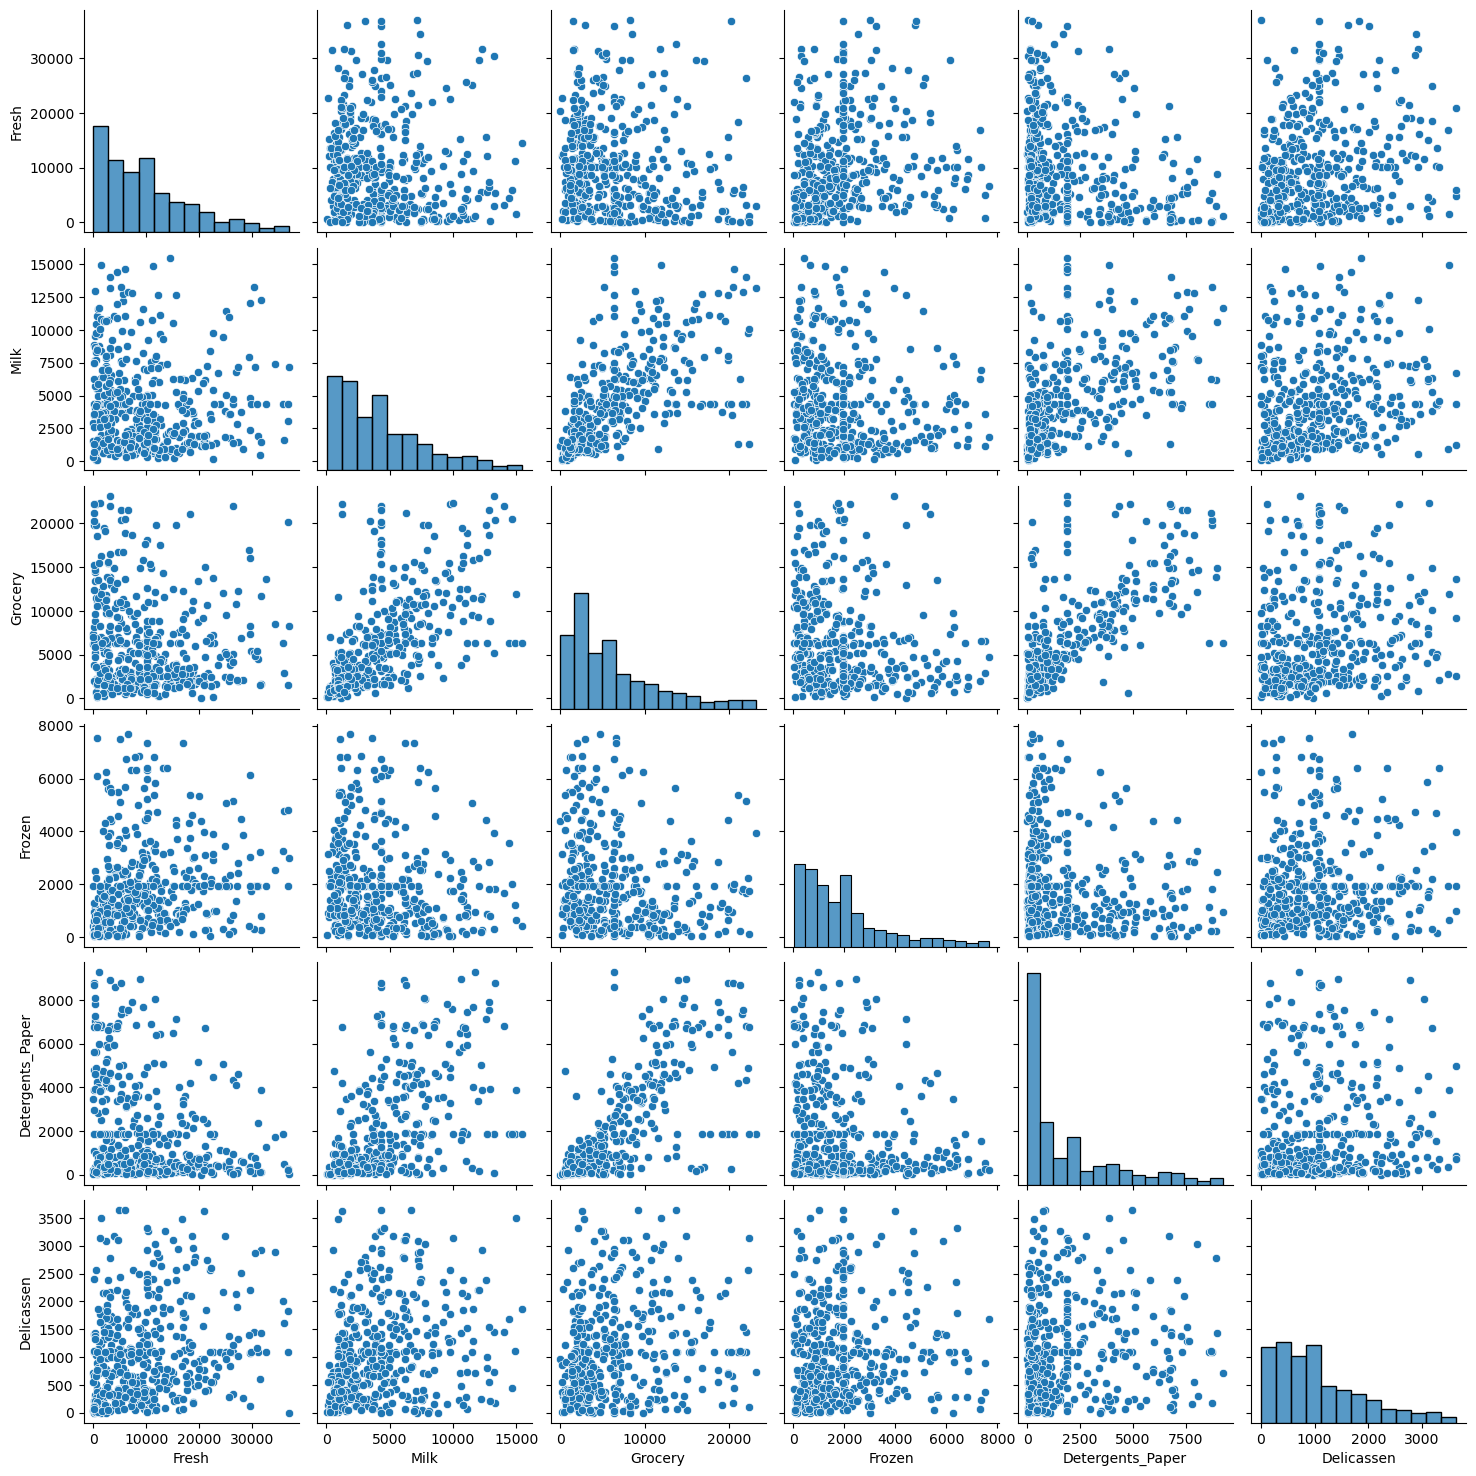

In [19]:
#Pairplot for all our column with the clean dataset
plt.figure(figsize=(18,12))
sns.pairplot(groc_data_clean)
plt.savefig(f'PairplotWithoutOutliers')
plt.show()

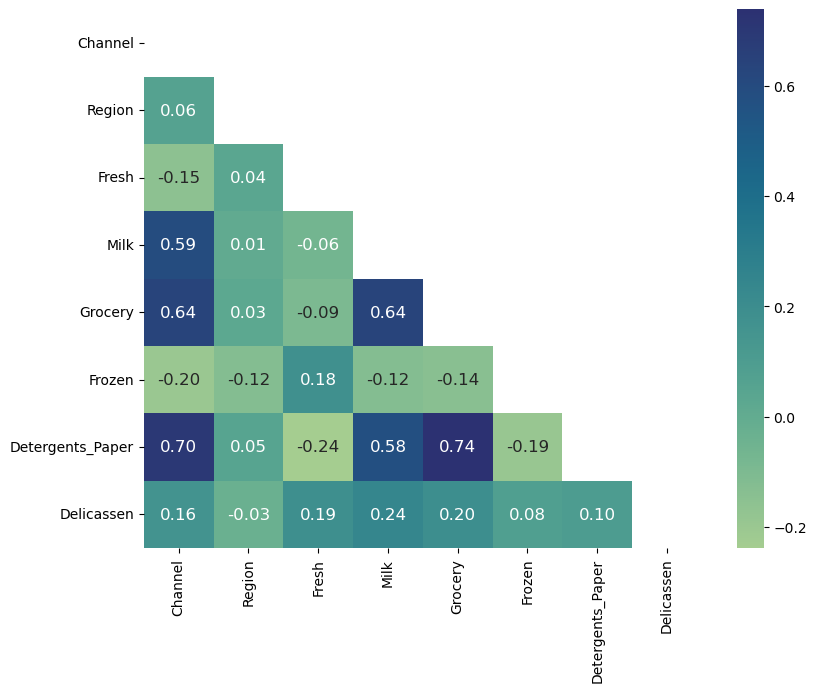

In [45]:
#correlation heatmap without outliers
plt.figure(figsize=(9,7))
sns.heatmap(
   data_clean.corr(),
   annot=True,
   annot_kws={'size':'large'},
   fmt=".2f",
   cmap="crest",
   mask=np.triu(np.ones_like(data.corr(), dtype=bool))
)
plt.savefig('CorrelationHeatmapWithoutOutliers')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
scaler = StandardScaler()

In [22]:
data_scaled = scaler.fit_transform(data_clean)

In [23]:
data_scaled = pd.DataFrame(data_scaled, columns=data_clean.columns)
data_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,8.175279e-17,1.211152e-16,2.422305e-17,4.037175e-17,1.614870e-17,5.652044e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-1.197824e+00,-1.258407e+00,-1.183809e+00,-1.145735e+00,-8.374255e-01,-1.298170e+00
25%,-6.902971e-01,-7.023369e-01,-8.273442e-01,-8.229609e-01,-7.798279e-01,-7.158725e-01,-7.241179e-01,-8.151079e-01
50%,-6.902971e-01,5.906683e-01,-1.899203e-01,-2.060300e-01,-2.908234e-01,-2.461556e-01,-4.741715e-01,-1.508598e-01
75%,1.448652e+00,5.906683e-01,5.556034e-01,5.526123e-01,4.805448e-01,3.579587e-01,3.615135e-01,5.160703e-01
max,1.448652e+00,5.906683e-01,3.192917e+00,3.288439e+00,3.161144e+00,3.443856e+00,3.298356e+00,3.033597e+00


In [24]:
#I would try and find the optimum clusters amount using elbow mthod

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [25]:
from sklearn.cluster import KMeans


In [46]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init='auto')
kmeans.fit(data_scaled)
kmeans.inertia_

2128.749633058007

The inertia amount is 2100, we would plot a graph using the elbow method to visualize the optimum number of clusters

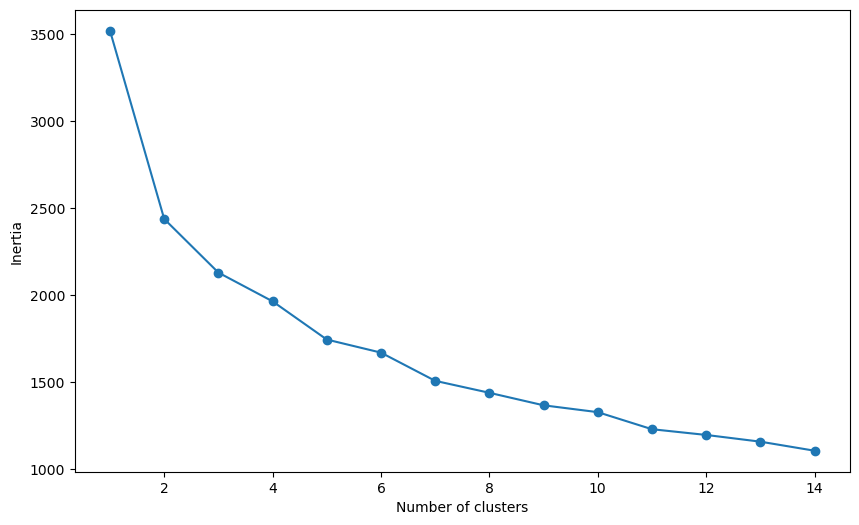

In [29]:
SSE=[] #creating empty list to store the inertia score
for cluster in range(1,15):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init='auto')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

#converting the result into a dataframe to plot it
kmeans_df = pd.DataFrame({'Cluster':range(1,15), 'SSE': SSE})
plt.figure(figsize=(10,6))
plt.plot(kmeans_df['Cluster'], kmeans_df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('KMeansElbowNumberOfClusters.png')
plt.show()


From the plot above, the optimal clusters around 6 


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

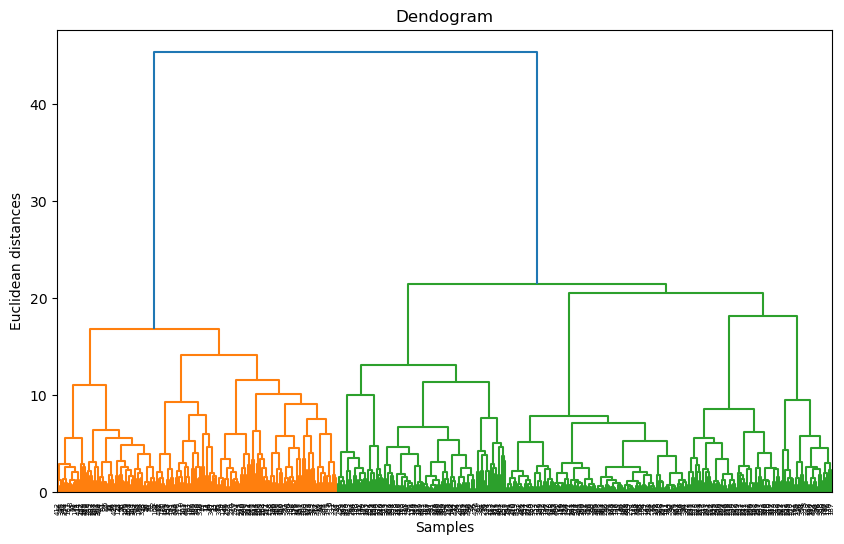

In [47]:
# plotting a dendogram to determine the optimal number of clusters for a hierarchial cluster
plt.figure(figsize=(10,6))
dend=sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.savefig('DendogramPlot.png')
plt.show()

In [32]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [33]:
data_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.303894,1.570224,0.236324,-1.032463,0.355262,0.293164
1,1.448652,0.590668,-0.361481,1.615595,0.613436,-0.104716,0.631665,0.815265
2,1.448652,0.590668,-0.444949,1.320388,0.259436,0.280646,0.731242,-0.000070
3,-0.690297,0.590668,0.374558,-0.922247,-0.391255,2.677326,-0.612373,0.829569
4,1.448652,0.590668,1.483121,0.319275,0.168117,1.185619,-0.045277,-0.000070
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,2.323495,2.275835,1.827069,-0.000435,-0.757496,1.325446
436,-0.690297,0.590668,-0.000101,-0.853012,-1.040818,1.542215,-0.797238,1.494711
437,1.448652,0.590668,0.524658,3.288439,-0.000051,-0.898815,-0.000178,0.923738
438,-0.690297,0.590668,0.021833,-0.690972,-0.764984,-0.538624,-0.763748,1.231277


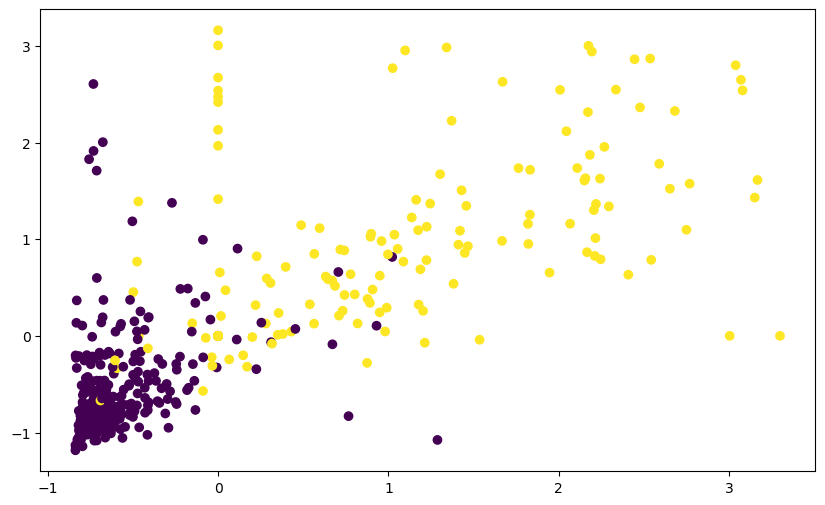

In [34]:
plt.figure(figsize=(10, 6))  
plt.scatter(data_scaled['Detergents_Paper'], data_scaled['Grocery'], c=cluster.labels_)
plt.savefig('HierarchialClusteringWithDetergents_Paper&Grocery.png')
plt.show() 

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [35]:
from sklearn.decomposition import PCA


In [36]:
pca = PCA(n_components=2) #reduce to 2 components for sake of visualization
prin_comp = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=prin_comp, columns=['PC1', 'PC2'])

In [37]:
#Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

Explained variance by each component: [0.38660722 0.16668382]


In [43]:
pca_df['Cluster'] = cluster.labels_

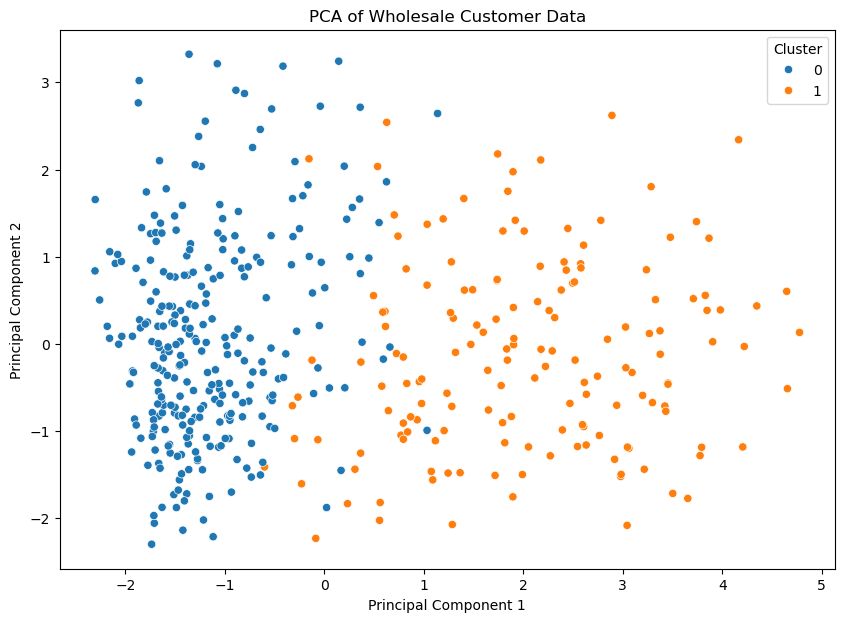

In [44]:
#Visualizing the principle components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'])
plt.title('PCA of Wholesale Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("PrincipleComponentsCluster.png")
plt.show()

In [40]:
# Get the loadings of the original features on the principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=data_clean.columns)

loadings = pd.DataFrame(loadings)
loadings.sort_values(by=['PC1', 'PC2'], ascending=False).head(4)

,PC1,PC2
Detergents_Paper,0.499840,-0.079610
Grocery,0.493689,0.087912
Channel,0.484558,-0.008581
Milk,0.455849,0.160188


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### Findings 

1. Prior to cleaning of the data, I noticed that the data for all columns except the Region and Channel colun were extremely left skewed. After replacing outliers with the mean of the non-outliers data there is still a left skew but it's way less than before.
2. I noticed there were more outliers in Region 3 in comparison to other regions. More information might be needed to conclude on why this might be happening.
3. While using a PCA of 2, 55% of the variance can be explained. I also noticed that Detergents_Paper, Grocery, Channel & main contributors to the PC1, which compound combinations of features best describe customers.  
4. The number of clusters for each analysis includes:
    -  PCA : It seems like there were 3 clusters, the third cluster seems like it was more of noise
    -  KMeans Clustering: The optimal number of clusters using inertia was around 6
    -  Hierachial Clustering: The number of clustering was identified at 2.
    -  Given the various results, I will like to conclude that there are 2 or 3 mainly identified clusters.